**Decision Trees**

In [6]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [7]:
df = pd.read_csv('Fruit_Classification.csv')
df

,Unnamed: 0,Color,Size,Fruit
0,0,Red,Large,Apple
1,1,Green,Large,Banana
2,2,Red,Medium,Banana
3,3,Red,Large,Apple
4,4,Red,Large,Apple
...,...,...,...,...
95,95,Green,Large,Apple
96,96,Green,Medium,Apple
97,97,Green,Large,Apple
98,98,Yellow,Small,Banana


In [8]:
df = df.drop('Unnamed: 0', axis=1)
df

,Color,Size,Fruit
0,Red,Large,Apple
1,Green,Large,Banana
2,Red,Medium,Banana
3,Red,Large,Apple
4,Red,Large,Apple
...,...,...,...
95,Green,Large,Apple
96,Green,Medium,Apple
97,Green,Large,Apple
98,Yellow,Small,Banana


In [9]:
df['Color'] = df['Color'].map({'Green': 0, 'Yellow': 1, 'Red': 2})
df['Size'] = df['Size'].map({'Small': 0, 'Medium': 1, 'Large': 2})
df['Fruit'] = df['Fruit'].map({'Apple': 0, 'Banana': 1})

# Step 4: Create and Train the Decision Tree Model Split the data into train and test sets and then fit the model.

In [10]:
X = df[['Color', 'Size']]  # Features
y = df['Fruit']            # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

# Step 5: Make Predictions

In [11]:
# Predicting a fruit: Red and Small
prediction = model.predict([[2, 0]])
prediction = 'Apple' if prediction == 0 else 'Banana'
print(prediction)

Apple


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [12]:
test_predictions = model.predict(X_test)

# **Step-6 Evaluating the model**

In [13]:
from sklearn.metrics import accuracy_score
# Measure Accuracy of the Classifier
print("Accuracy:", accuracy_score(y_test, test_predictions) * 100)

Accuracy: 63.33333333333333


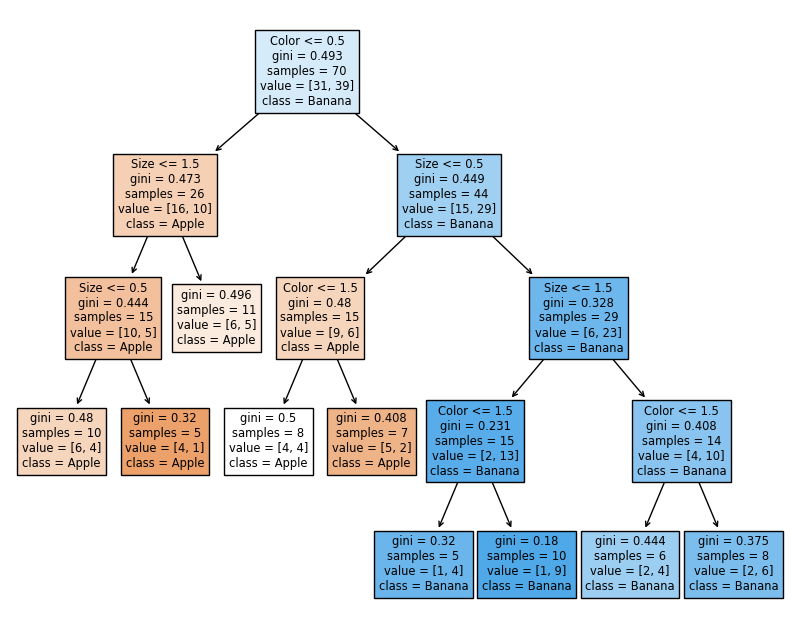

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=['Color', 'Size'], class_names=['Apple', 'Banana'])
plt.show()